# How to combine ScanFields of multiple detectors.
In this notbook, we demonstrate the sumation of scan field which including cross-link

In [1]:
%load_ext autoreload
%autoreload 2
import litebird_sim as lbs
import numpy as np
import healpy as hp
import sbm
import logging
import toml
from pathlib import Path
import matplotlib.pyplot as plt
logging.basicConfig(level=logging.WARNING)

In [2]:
# Load your Imo in litebird_sim

CONFIG_PATH = Path.home() / ".config" / "litebird_imo"
CONFIG_FILE_PATH = CONFIG_PATH / "imo.toml"
tomlinfo = toml.load(CONFIG_FILE_PATH)
flatfile_location = tomlinfo["repositories"][0]["location"]

imo_version = "v2"
imo = lbs.Imo(flatfile_location=flatfile_location)

In [7]:
# Load LiteBIRD channel from SBM's channel list
channel = sbm.channel_list[1]
# Define the telescope
telescope = channel[0] + "FT"
print("Channel: ", channel)

# Load the channel info
ch_info = lbs.FreqChannelInfo.from_imo(
    url=f"/releases/{imo_version}/satellite/{telescope}/{channel}/channel_info", imo=imo
)

Channel:  L2-050


Let's collect detector's name:

In [9]:
dets_list = ch_info.detector_names
print(f"Num of detectors: {len(dets_list)}\n")
print("Detector names: ")
for det in dets_list:
    print(det)

Num of detectors: 24

Detector names: 
000_000_000_QA_050_T
000_000_000_QA_050_B
000_000_001_QB_050_T
000_000_001_QB_050_B
000_000_002_UA_050_T
000_000_002_UA_050_B
000_003_000_UB_050_T
000_003_000_UB_050_B
000_003_001_UA_050_T
000_003_001_UA_050_B
000_003_002_QB_050_T
000_003_002_QB_050_B
000_004_002_UA_050_T
000_004_002_UA_050_B
000_004_001_QB_050_T
000_004_001_QB_050_B
000_004_000_QA_050_T
000_004_000_QA_050_B
000_007_002_QB_050_T
000_007_002_QB_050_B
000_007_001_UA_050_T
000_007_001_UA_050_B
000_007_000_UB_050_T
000_007_000_UB_050_B


SBM's .load_channel() has arguments like below:

```python
sbm.load_channel(cls, channel: str, detector_list=None, base_path=DB_ROOT_PATH)
```


If `detector_list` is `None`, every **TOP** detector (i.e. ignore Bottom detector) in the channel will be loaded and hit-map and cross-links are also combined automatically. 

So, cancelation of ${}_{2}\tilde{h}$ will never happen. 
Now, let's demonstrait it!

In [16]:
# Load every detector in the channel
sf = sbm.ScanFields.load_channel(channel)

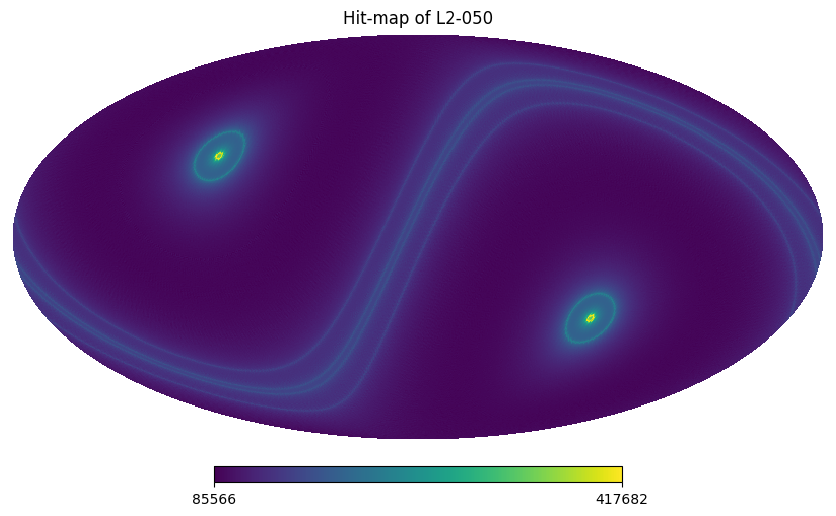

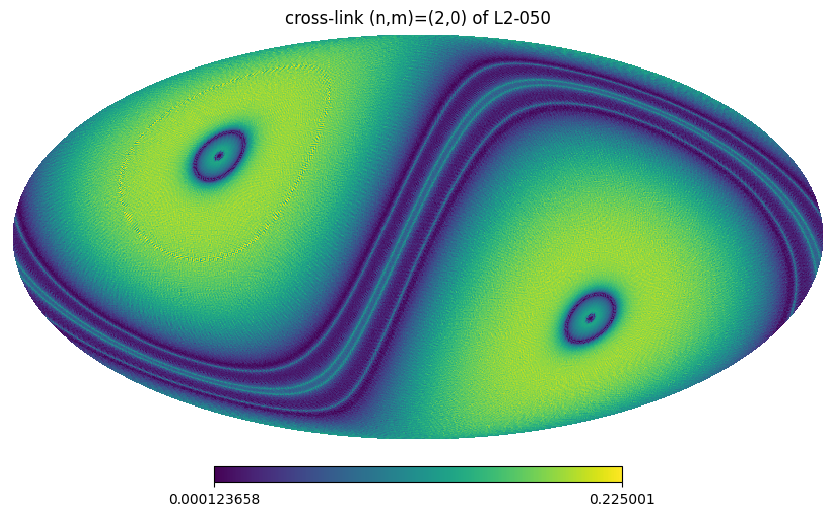

In [17]:
hp.mollview(sf.hitmap, title=f"Hit-map of {channel}")
hp.mollview(np.abs(sf.get_xlink(2,0)), title=f"cross-link (n,m)=(2,0) of {channel}")

Now, let's input exact detector name as below:

In [18]:
# Load every detector in the channel
sf = sbm.ScanFields.load_channel(channel, detector_list=dets_list)

Now, we can see the hit-map twice laager than before because we took into account bottm detector now. And we can observe cancelation of cross-link.

We have to consider what kind of cross-link do we need. 

For example, if we consider differential gain. If we make cross-link by top and bottom detector, the temperature leakage what we may want to simulate will be disapper because we canceled out the important spin-(2,0) cross-link for differential gain. 

In this case, we have to make the cross-link either top or bottom detectors. 

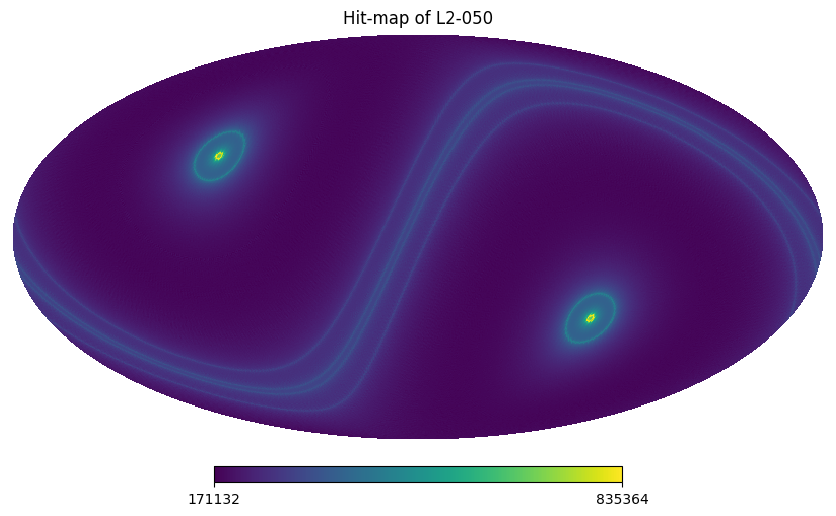

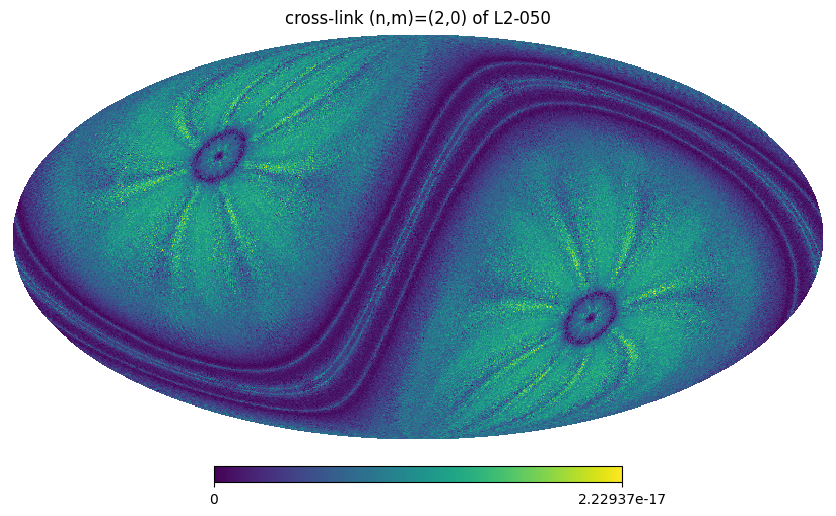

In [22]:
hp.mollview(sf.hitmap, title=f"Hit-map of {channel}")
hp.mollview(np.abs(sf.get_xlink(2,0)), title=f"cross-link (n,m)=(2,0) of {channel}")